In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [84]:
!pip install joblib

__1.Data Acquisation__

In [85]:
df = pd.read_csv("heart.csv")

In [86]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [87]:
df.shape

(918, 12)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [89]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


__Data Filteration__

In [90]:
df.isna().sum()/len(df)*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [91]:
!pip install missingno

In [92]:
import missingno as msno

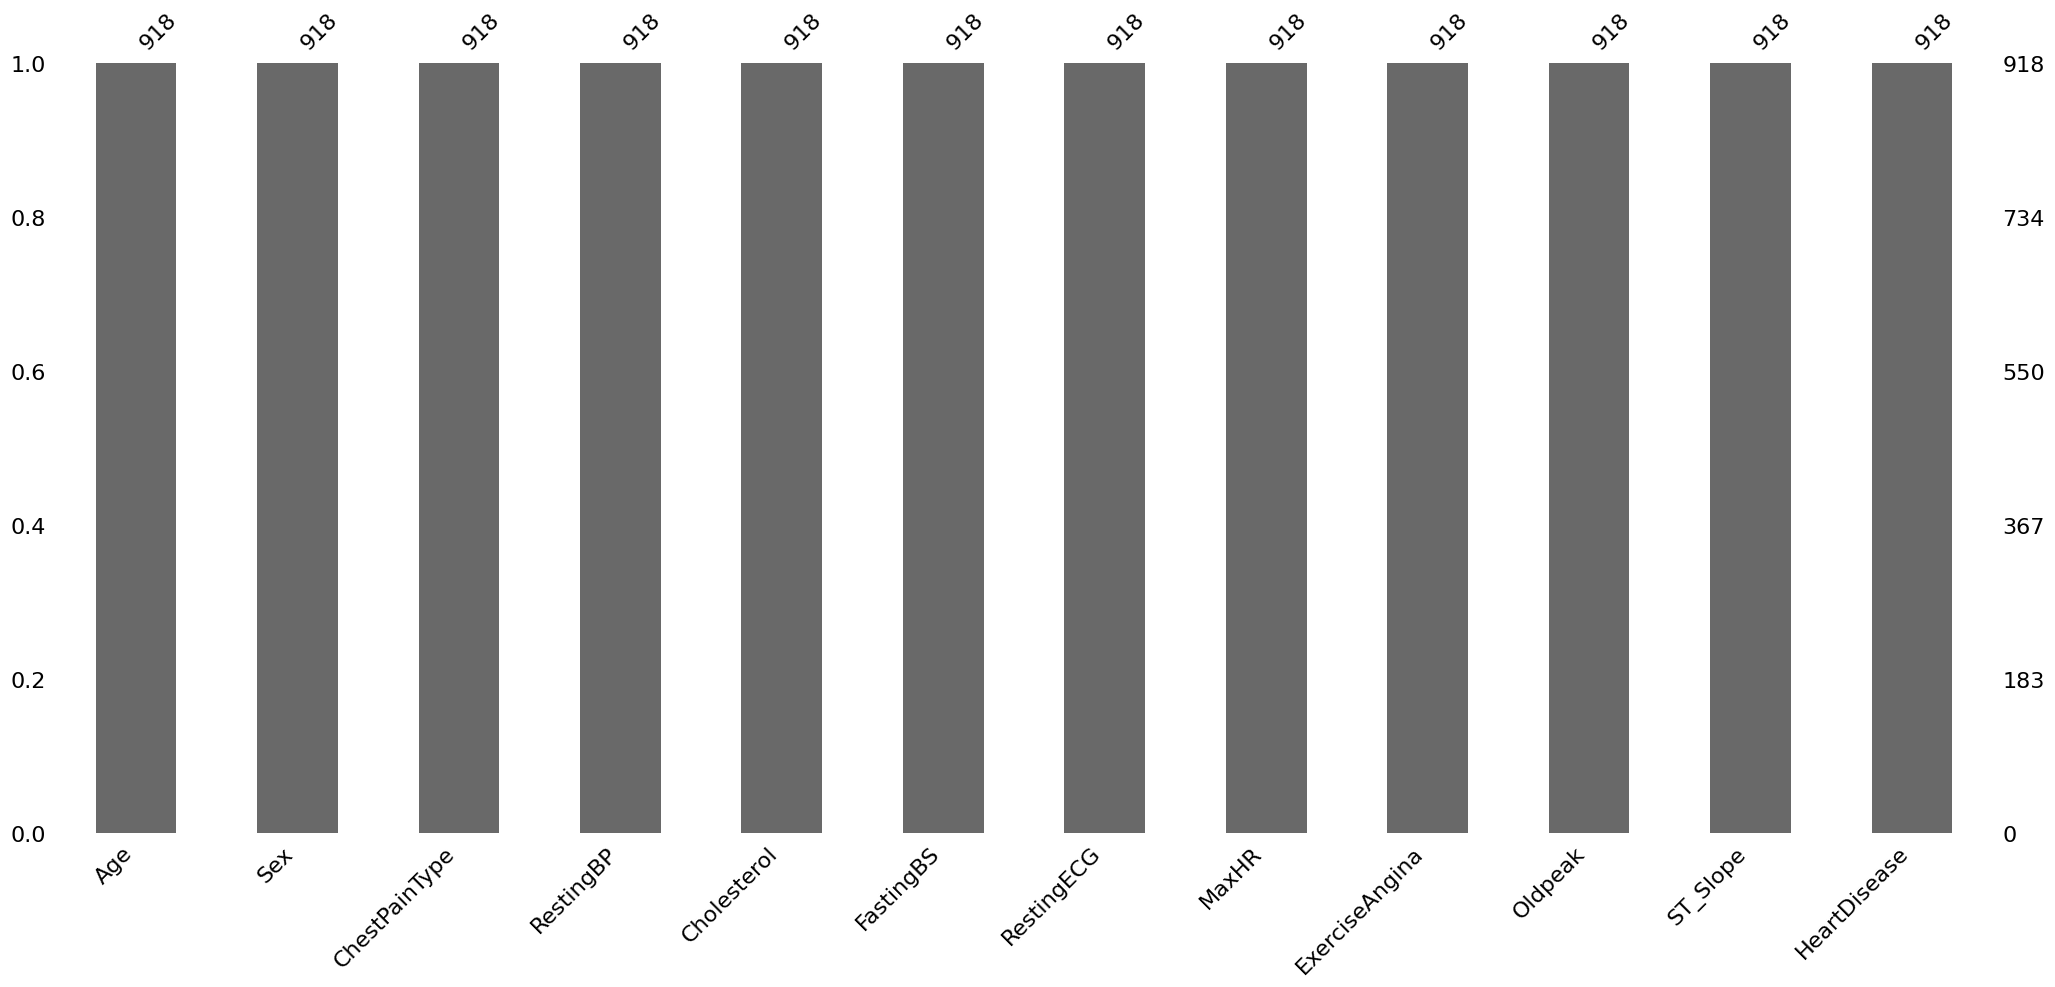

In [93]:
msno.bar(df)
plt.show()

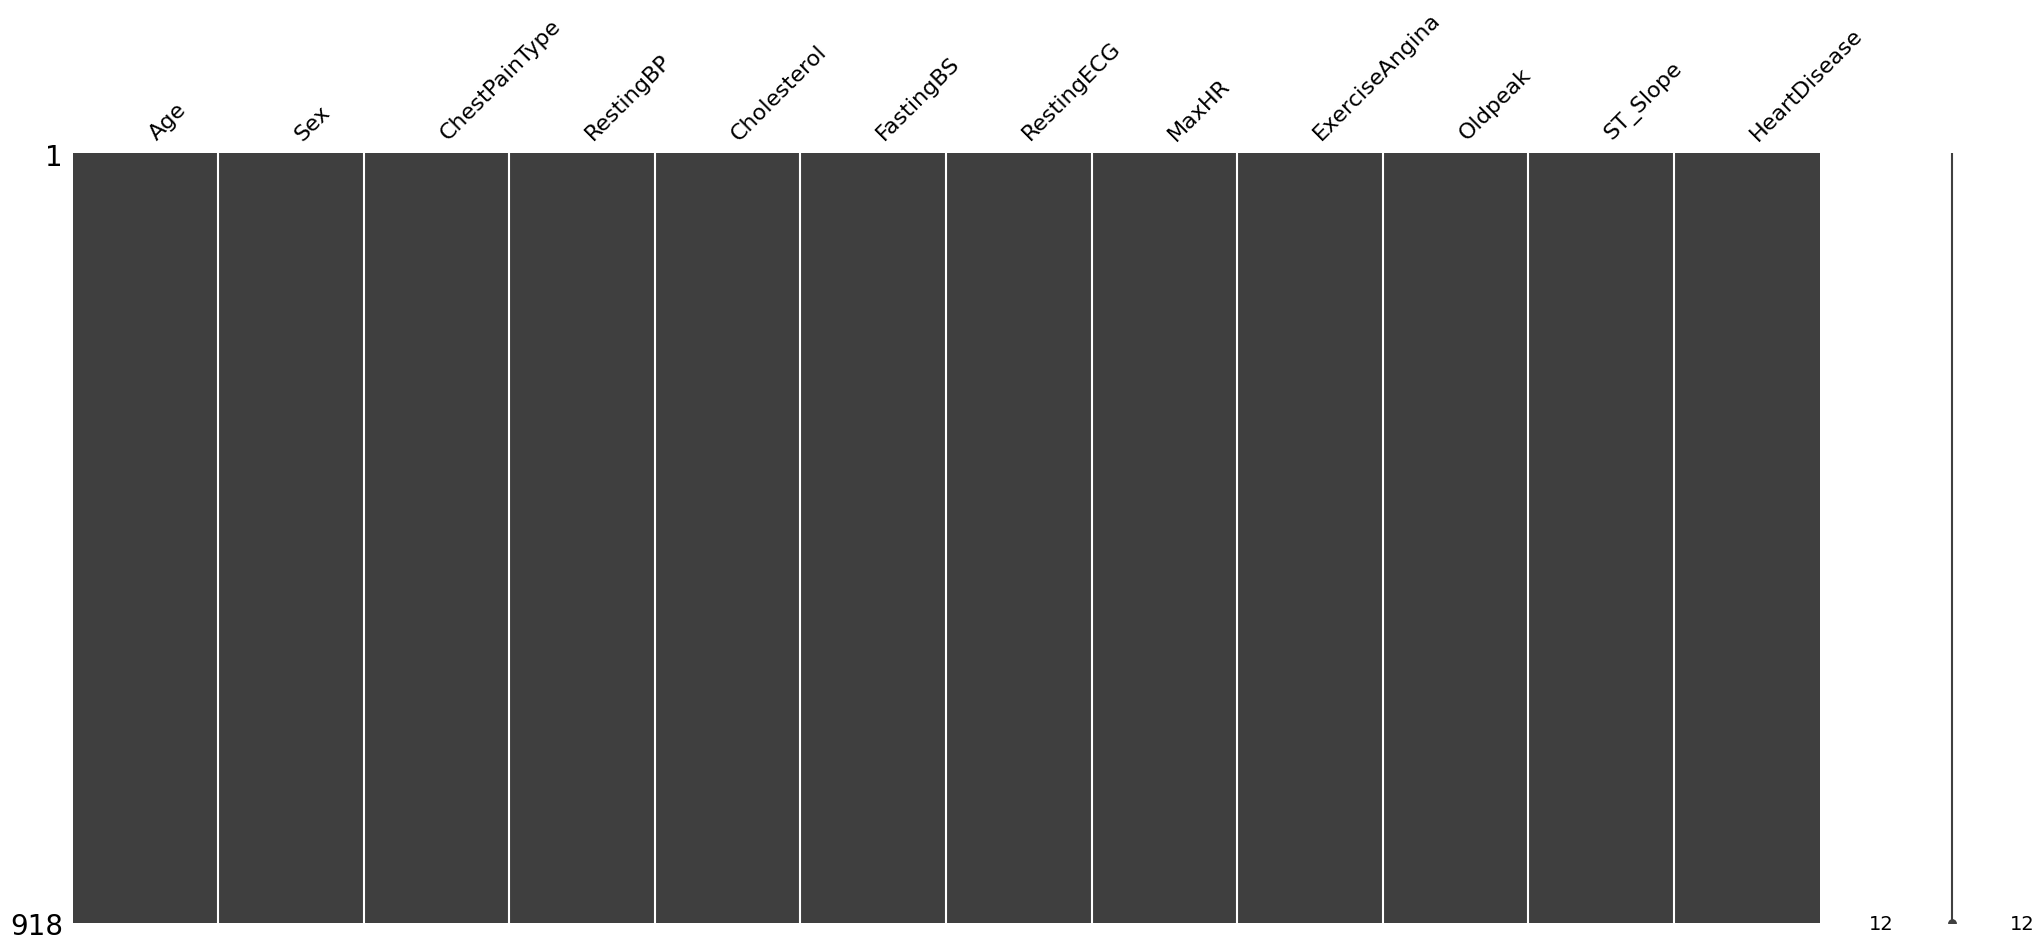

In [94]:
#can visualize the relativel missingness of column

msno.matrix(df)
plt.show()

__Checking for duplication__

In [95]:
df.duplicated().sum()

np.int64(0)

__Data Transformation__

In [96]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [98]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [99]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

<Axes: xlabel='ChestPainType'>

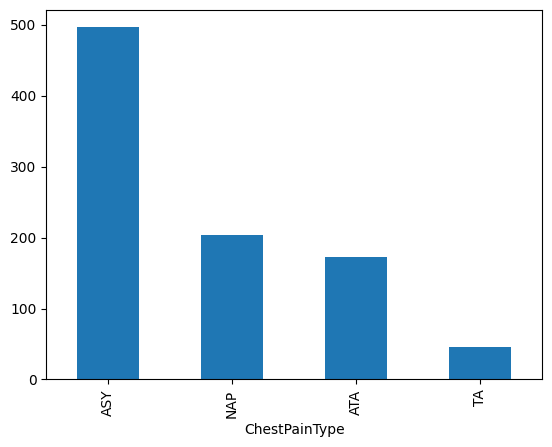

In [100]:
df["ChestPainType"].value_counts().plot(kind="bar")

In [101]:
#df["ChestPainType"]=df["ChestPainType"].replace(["ASY","NAP","ATA","TA"],[0,1,2,3])

In [102]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [103]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

<Axes: xlabel='RestingECG'>

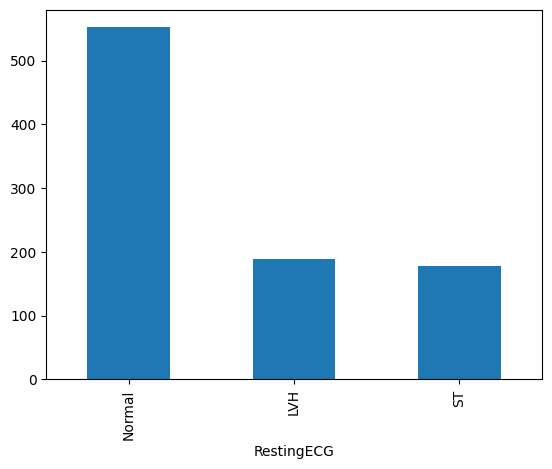

In [104]:
df["RestingECG"].value_counts().plot(kind="bar")

In [105]:
#df["RestingECG"]=df["RestingECG"].replace(["Normal","ST","LVH"],[0,1,2])

In [106]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [107]:
#df["ST_Slope"]=df["ST_Slope"].replace(["Up","Flat","Down"],[0,1,2])

In [108]:
df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [109]:
#df["Sex"]= df["Sex"].replace(["M","F"],[0,1])

<Axes: xlabel='ExerciseAngina'>

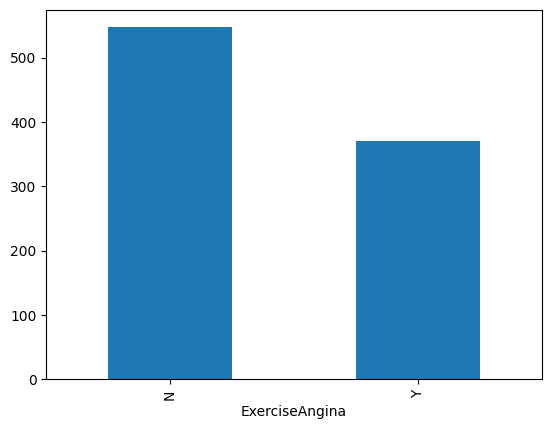

In [110]:
df["ExerciseAngina"].value_counts().plot(kind="bar")

In [111]:
#df["ExerciseAngina"]=df["ExerciseAngina"].replace(["N","Y"],[0,1])

In [112]:
# Label encoding for categorical features
label_encoders = {}

for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display encoded data
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [113]:
df_numeric = df.select_dtypes(include=[float, int])

In [114]:
df['Sex_category'] = le.fit_transform(df['Sex'])  # If the column is named 'sex'

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex_category'] = le.fit_transform(df['Sex_category'])

In [116]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Sex_category'],
      dtype='object')


In [117]:
df["ChestPainType"].value_counts(normalize = True)

ChestPainType
0    0.540305
2    0.221133
1    0.188453
3    0.050109
Name: proportion, dtype: float64

In [118]:
pd.get_dummies(df["ChestPainType"])

,0,1,2,3
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
913,False,False,False,True
914,True,False,False,False
915,True,False,False,False
916,False,True,False,False


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
 12  Sex_category    918 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 93.4 KB


In [120]:
# Scale numeric features: Age, RestingBP, Cholesterol, MaxHR, Oldpeak
scaler = StandardScaler()
scaled_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

# Display scaled data
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_category
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,-0.832432,2,0,1
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.105664,1,1,0
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,-0.832432,2,0,1
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.574711,1,1,0
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,-0.832432,2,0,1


__2.EDA__

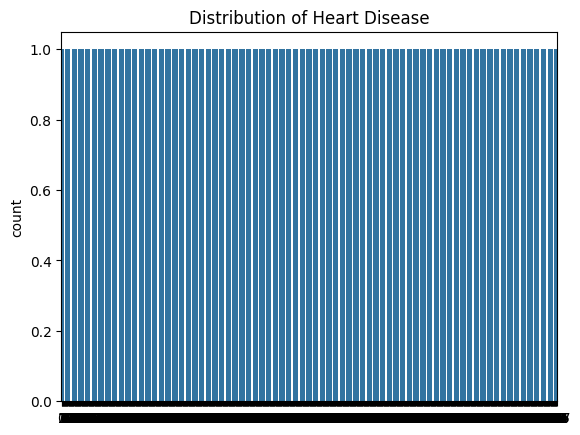

In [121]:
# Target variable distribution
sns.countplot(df['HeartDisease'])
plt.title('Distribution of Heart Disease')
plt.show()

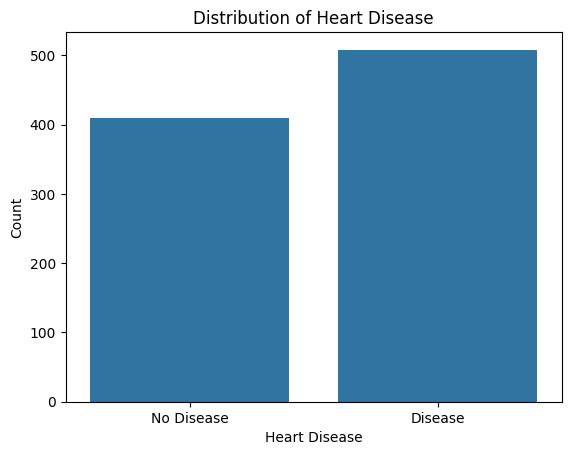

In [122]:
#for better understanding of the above plot
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])  # Adjust labels if needed
plt.show()

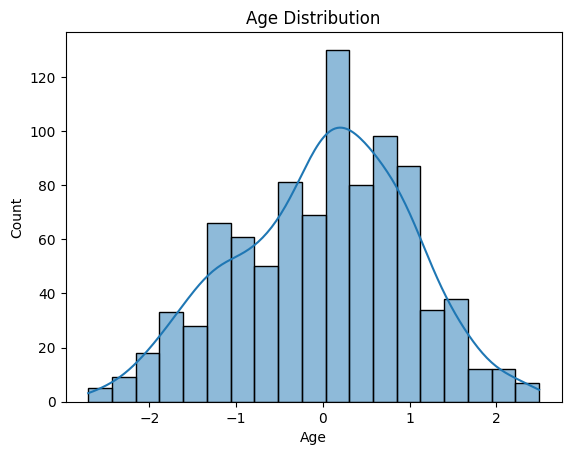

In [123]:
# Check the distribution of key features
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

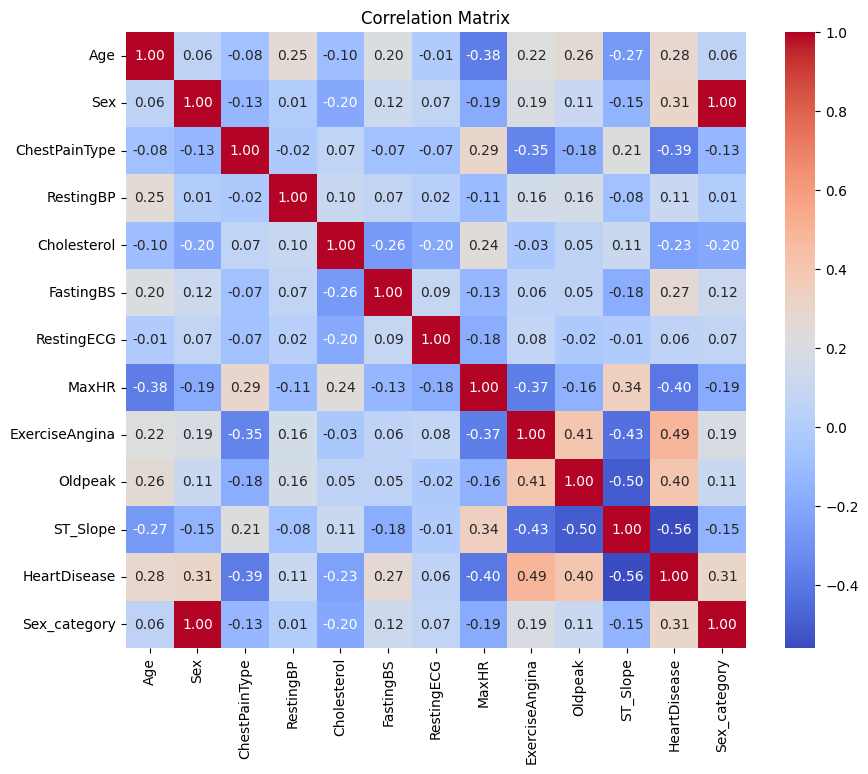

In [124]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

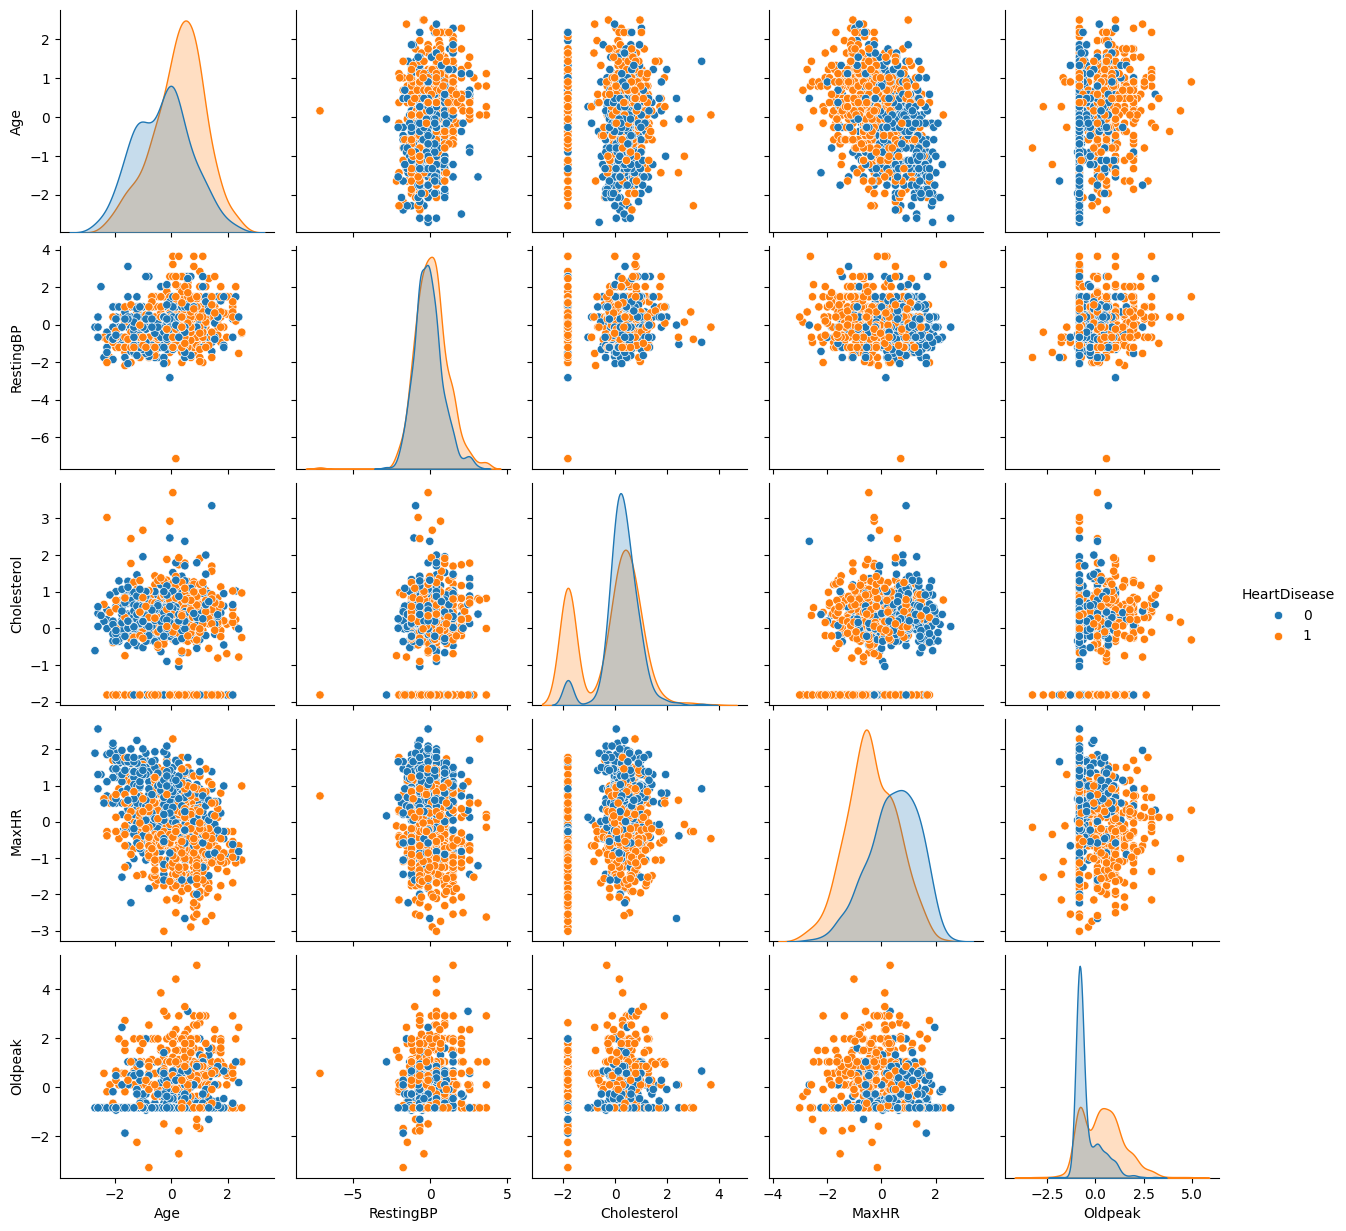

In [125]:
# Visualizing key relationships using pairplot
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease')
plt.show()


In [126]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


__3.Model Building__

In [127]:
# Split into features and target
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [128]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

__4.Model Evaluation__

In [129]:
# Make predictions
y_pred = model.predict(X_test)

In [130]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [131]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[65 17]
 [ 7 95]]


In [132]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        82
           1       0.85      0.93      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



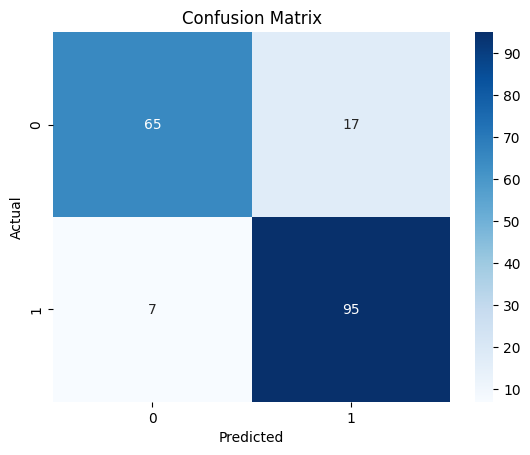

In [133]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

__5. Hyperparameter Tuning__

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Grid Search for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'C': 1}


In [141]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [142]:
import os

# List files in the current directory
print(os.listdir())


['.ipynb_checkpoints', 'Analyze  of movie review.ipynb', 'Analyze sentiments of movie reviews.ipynb.ipynb', 'Breast_cancer_prediction.ipynb', 'car data.csv', 'Car price prediction.ipynb', 'data.csv', 'Election 2024 Loksabha .ipynb', 'election_results_2024.csv', 'Emotions Recognition from speech.ipynb', 'gld_price_data[1].csv', 'Gold prediction.ipynb', 'Heart Disease risk assesment.ipynb', 'heart-disease.csv', 'heart.csv', 'heart_disease_model.pkl', 'IMDB Dataset.csv', 'kaggle.json', 'MNIST Character recognition with tensorflow.ipynb', 'model.pkl', 'sms-spams-classifications.ipynb', 'spam.csv', 'Untitled.ipynb', 'vectorizer.pkl']


In [143]:
import shutil

In [144]:
shutil.move('heart_disease_model.pkl', r'C:\Users\KRITIKA SINGH\OneDrive\Desktop\HeartDiseaseApp\heart_disease_model.pkl')

'C:\\Users\\KRITIKA SINGH\\OneDrive\\Desktop\\HeartDiseaseApp\\heart_disease_model.pkl'

In [ ]:
model = joblib.load('heart_disease_model.pkl')